# 1D Linear Regression

## What does it do? 

In a nutshell, tries to fit a straight line through a set of data points. 

Models relationship between: 
- Independent variables (or FEATURES)
- Dependent variable (target)

Linear Regression, though often limited, is still useful for: 
- Basic risk assessment 
- Sales forecasting for businesses
- Modeling biological relationships 
- Behavorial Sciences

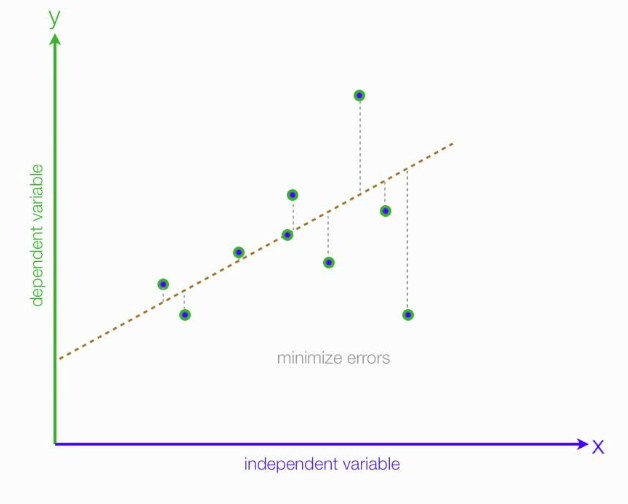

The goal is to find parameters w (weights) and b (bias/intercept) such that 

$$
\hat{y} = wx + b
$$

Where: 
- $ \hat{y}$: Predicted Value 
- $ x $: Input Feature
- $ w $: Weight (Slope)
- $ b $: Bias (Intercept)

## Loss Function: The MSE 

The goal is to minimize the difference between this approximated $ \hat{y}$ and the actual valus $ y$.

The most common way to measure this is using the Mean Squared Error. Large Errors are penalized more than small errors of course, due to the squaring in the expression.

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$


## Gradient Descent --- Why?

We need to optimize $ w$ and $ b$ by minimizing this loss function. Recall from calculus that minizing a function requires you to drive the derivative to $ zero$!!

We will thus need to compute the derivative (gradient) of the MSE with respect to the parameters we want to train .... $w$ and $b$!

## Gradient Descent: Step-by-step approach

1. Initialize $w$ and $b$ randomly 
2. Compute predictions 

$$
\hat{y}_i = wx_i + b
$$

3. Compute gradients of the loss with respect to $w$ and $b$:

$$
\frac{\partial \text{MSE}}{\partial w} = -\frac{2}{n} \sum_{i=1}^{n} x_i (y_i - \hat{y}_i)
$$

$$
\frac{\partial \text{MSE}}{\partial b} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)
$$


4. Utilize an **update rule** to update the parameters: 

$$
w := w - \alpha \cdot \frac{\partial \text{MSE}}{\partial w}
$$

$$
b := b - \alpha \cdot \frac{\partial \text{MSE}}{\partial b}
$$

Where $\alpha$ is the **learning rate**. This is another *hyperparameter* we tune.

Repeat this process until parameters' loss stop decreasing signifcantly --- i.e. converges. 



## Limitations of Linear Regression 

- Of course, models linear relationships 
- Sensitive to outliers and assumes *equal variance of errors*

# Multivariate Linear Regression  

Yes! This is not restricted to just lines in a 2D Euclidean space. 

This can apply for multiple dimensions as well, with just the following modifications. 

In a nutshell, instead of scalars we are handling vectors and matrices. 

We are to instead fit the model 

$$
\hat{y} = \mathbf{X} \cdot \mathbf{w} + b
$$

where $X$ is a matrix $n$ x $d$ and $w$ is a vector of weights $d$ x $1$


## Multivariate MSE

The **Mean Squared Error (MSE)** remains:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Or, in vector form:

$$
\text{MSE} = \frac{1}{n} \left\| \mathbf{y} - (\mathbf{Xw} + b) \right\|^2
$$

## Multivariate Gradients

Gradient with respect to weights:

$$
\frac{\partial \text{MSE}}{\partial \mathbf{w}} = -\frac{2}{n} \mathbf{X}^T (\mathbf{y} - \hat{\mathbf{y}})
$$

Gradient with respect to bias:

$$
\frac{\partial \text{MSE}}{\partial b} = -\frac{2}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)
$$

## Multivariate Parameter Updates


$$
\mathbf{w} := \mathbf{w} - \alpha \cdot \frac{\partial \text{MSE}}{\partial \mathbf{w}}
$$

$$
b := b - \alpha \cdot \frac{\partial \text{MSE}}{\partial b}
$$

Where $\alpha$ is the learning rate.

## Code Implementation: 1D Linear Regression 

Let's utilize Linear Regression with some synthetic data. 

### Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Generate synthetic data

In [2]:
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
true_w, true_b = 3.5, 1.2
y = true_w * X + true_b + np.random.randn(100, 1) * 0.5 

### Initialize Parameters

In [3]:
w = np.random.randn()
b = np.random.randn()
learning_rate = 0.1
epochs = 1000

### Gradient Descent Loop

In [4]:
losses = []

for epoch in range(epochs):
    y_pred = w * X + b
    error = y - y_pred
    loss = np.mean(error ** 2)
    losses.append(loss)
    
    # Gradients
    grad_w = -2 * np.mean(X * error)
    grad_b = -2 * np.mean(error)

    # Parameter update
    w -= learning_rate * grad_w
    b -= learning_rate * grad_b

### Run this gradient descent loop on synthetic data, and plot

Learned parameters: w = 3.484, b = 1.311


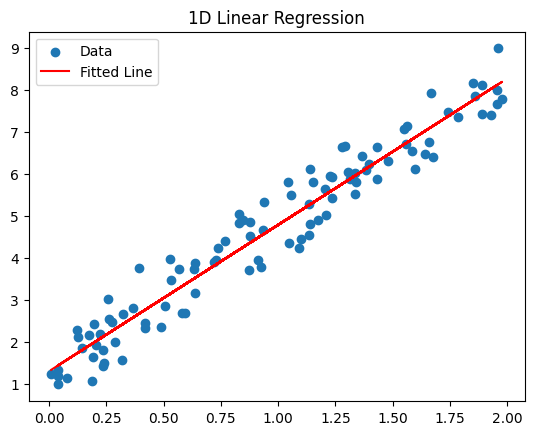

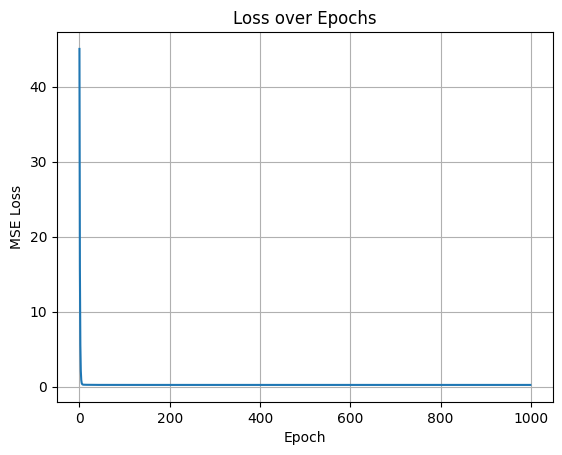

In [6]:
print(f"Learned parameters: w = {w:.3f}, b = {b:.3f}")

plt.scatter(X, y, label="Data")
plt.plot(X, w * X + b, color="red", label="Fitted Line")
plt.title("1D Linear Regression")
plt.legend()
plt.show()

plt.plot(losses)
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()

## Code Implementation: Multivariate Linear Regression 

### Generate synthetic multivariate data

In [7]:
np.random.seed(42)
n_samples, n_features = 200, 3
X = np.random.rand(n_samples, n_features)

true_w = np.array([2.0, -3.5, 1.0])   
true_b = 4.2

In [8]:
y = X @ true_w + true_b + np.random.randn(n_samples) * 0.3

### Initialize random values for regression

In [9]:
w = np.random.randn(n_features)
b = np.random.randn()
learning_rate = 0.05
epochs = 500

losses = []

### Training Loop

In [10]:
for epoch in range(epochs):
    y_pred = X @ w + b
    error = y - y_pred
    loss = np.mean(error ** 2)
    losses.append(loss)

    # Gradients
    grad_w = -2 * (X.T @ error) / n_samples
    grad_b = -2 * np.mean(error)

    # Parameter update
    w -= learning_rate * grad_w
    b -= learning_rate * grad_b

### Print Results

Learned weights: [ 2.12616006 -3.43729383  1.05870028]
Learned bias: 4.047


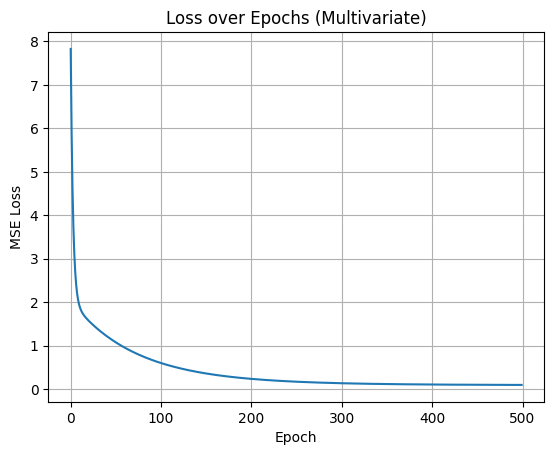

In [11]:
print(f"Learned weights: {w}")
print(f"Learned bias: {b:.3f}")

plt.plot(losses)
plt.title("Loss over Epochs (Multivariate)")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()